In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [31]:
df = pd.read_csv('iris.csv')

In [32]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df = df.iloc[:,1:]

In [34]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
encoder = LabelEncoder()

In [37]:
df['Species'] = encoder.fit_transform(df['Species'])

In [38]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [40]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

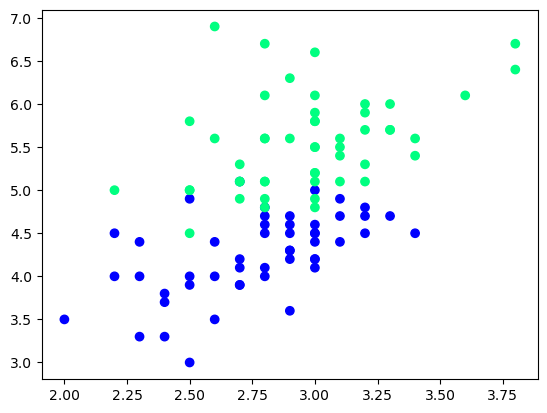

In [42]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [43]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
82,2.7,3.9,1
80,2.4,3.8,1
103,2.9,5.6,2
81,2.4,3.7,1
100,3.3,6.0,2
105,3.0,6.6,2
108,2.5,5.8,2
67,2.7,4.1,1
101,2.7,5.1,2
57,2.4,3.3,1


In [44]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [45]:
df_train

,SepalWidthCm,PetalLengthCm,Species
111,2.7,5.3,2
50,3.2,4.7,1
82,2.7,3.9,1
147,3.0,5.2,2
101,2.7,5.1,2
131,3.8,6.4,2
54,2.8,4.6,1
144,3.3,5.7,2
107,2.9,6.3,2
70,3.2,4.8,1


In [46]:
df_val

,SepalWidthCm,PetalLengthCm,Species
103,2.9,5.6,2
134,2.6,5.6,2
53,2.3,4.0,1
97,2.9,4.3,1
76,2.8,4.8,1


In [47]:
df_test

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
140,3.1,5.6,2
64,2.9,3.6,1
139,3.1,5.4,2
81,2.4,3.7,1


In [48]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [49]:
y_test

array([2, 2, 1, 1, 1])

# Case 1 - Bagging

In [50]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
82,2.7,3.9,1
147,3.0,5.2,2
147,3.0,5.2,2
101,2.7,5.1,2
54,2.8,4.6,1
144,3.3,5.7,2
54,2.8,4.6,1
107,2.9,6.3,2


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [52]:
dt_bag1 = DecisionTreeClassifier()

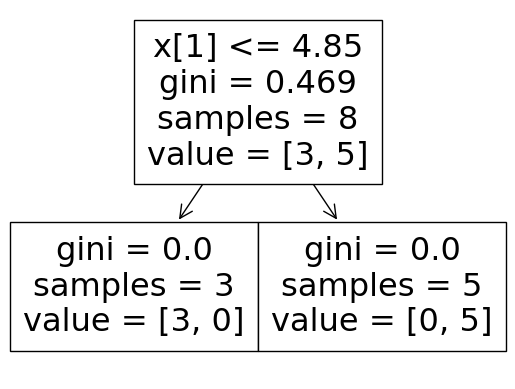

1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


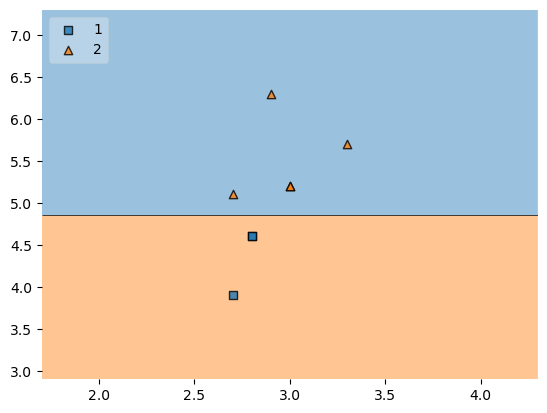

In [57]:
evaluate(dt_bag1,X,y)

In [58]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
147,3.0,5.2,2
101,2.7,5.1,2
111,2.7,5.3,2
101,2.7,5.1,2
107,2.9,6.3,2
70,3.2,4.8,1
111,2.7,5.3,2
50,3.2,4.7,1


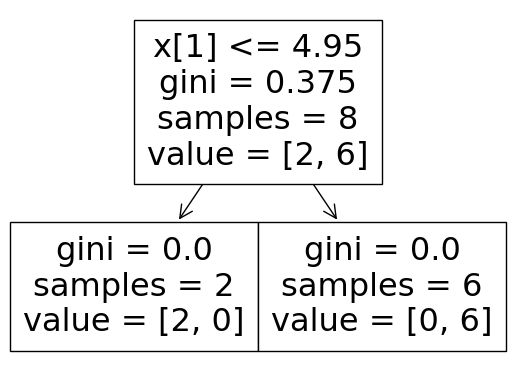

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


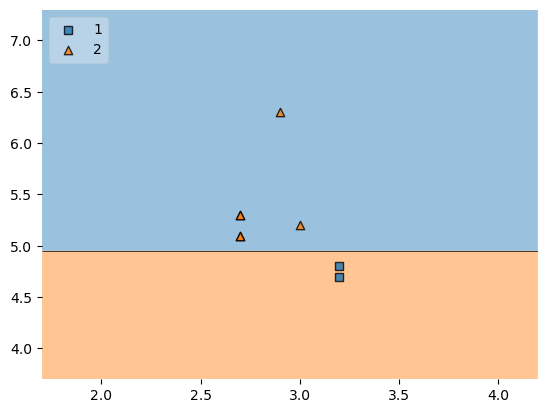

In [59]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [84]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
54,2.8,4.6,1
144,3.3,5.7,2
111,2.7,5.3,2
107,2.9,6.3,2
50,3.2,4.7,1
101,2.7,5.1,2
70,3.2,4.8,1
144,3.3,5.7,2


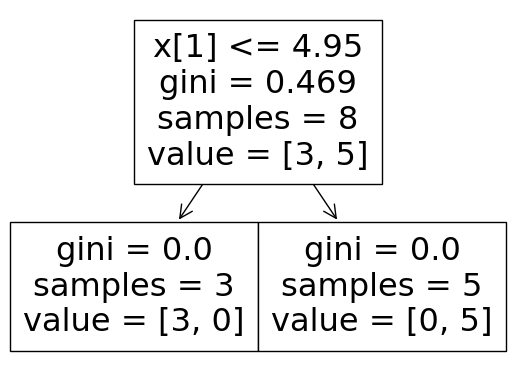

1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


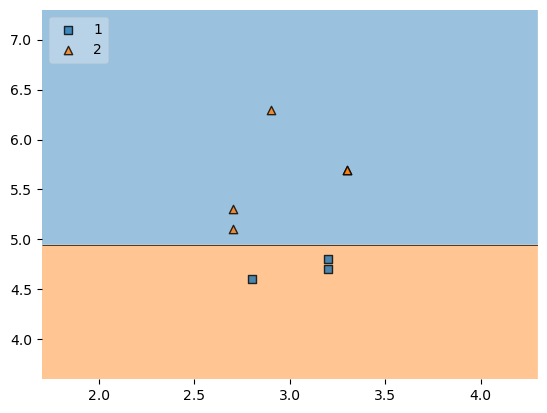

In [85]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [86]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

## Predict

In [87]:
df_test

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
140,3.1,5.6,2
64,2.9,3.6,1
139,3.1,5.4,2
81,2.4,3.7,1


In [90]:
print("Predictor 1",dt_bag1.predict(np.array([3.1,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.1,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.1,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [91]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
111,2.7,5.3,2
50,3.2,4.7,1
82,2.7,3.9,1
147,3.0,5.2,2
101,2.7,5.1,2
131,3.8,6.4,2
54,2.8,4.6,1
144,3.3,5.7,2
107,2.9,6.3,2
70,3.2,4.8,1


In [96]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
144,3.3,5.7,2
147,3.0,5.2,2
50,3.2,4.7,1
111,2.7,5.3,2
131,3.8,6.4,2
107,2.9,6.3,2
82,2.7,3.9,1
54,2.8,4.6,1


# Random Subspaces

In [97]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [98]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
31,32,5.4,3.4,1.5,0.4,Iris-setosa
119,120,6.0,2.2,5.0,1.5,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
110,111,6.5,3.2,5.1,2.0,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
3,4,4.6,3.1,1.5,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
80,81,5.5,2.4,3.8,1.1,Iris-versicolor


In [102]:
df1.sample(2,replace=True,axis=1)

,Id,Species
31,32,Iris-setosa
119,120,Iris-virginica
42,43,Iris-setosa
110,111,Iris-virginica
104,105,Iris-virginica
138,139,Iris-virginica
3,4,Iris-setosa
29,30,Iris-setosa
1,2,Iris-setosa
80,81,Iris-versicolor


# Random Patches

In [103]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
31,32,5.4,3.4,1.5,0.4,Iris-setosa
119,120,6.0,2.2,5.0,1.5,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
110,111,6.5,3.2,5.1,2.0,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
3,4,4.6,3.1,1.5,0.2,Iris-setosa
29,30,4.7,3.2,1.6,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
80,81,5.5,2.4,3.8,1.1,Iris-versicolor


In [104]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,Id
1,4.9,2
119,6.0,120
119,6.0,120
29,4.7,30
110,6.5,111
104,6.5,105
80,5.5,81
80,5.5,81
